In [1]:
import pandas as pd
import csv
data=pd.read_excel(r"C:\Users\Sahana S B\OneDrive\Documents\IRIS.xlsx")
data.to_csv(r"C:\Users\Sahana S B\OneDrive\Documents\IRIS.csv")
csv.reader(r"C:\Users\Sahana S B\OneDrive\Documents\IRIS.csv")
print(data)


     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [2]:
data.describe()


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

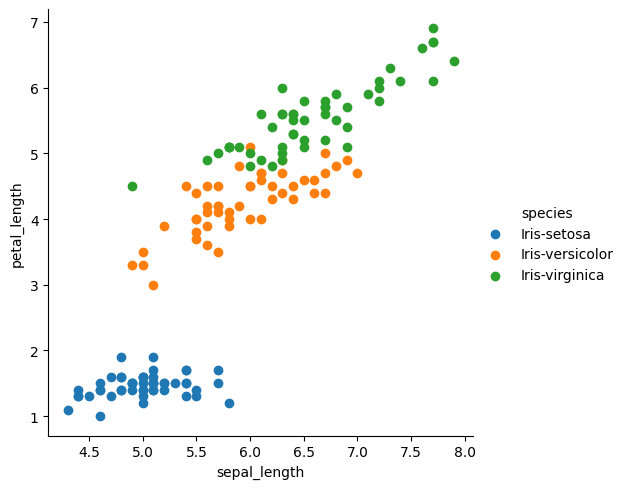

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(data,hue="species",height=5).map(plt.scatter,"sepal_length","petal_length").add_legend()



In [22]:
from sklearn.linear_model import LogisticRegression
y=data[["species"]].values
x=data[["sepal_length","sepal_width","petal_length","petal_width"]].values
model=LogisticRegression()
model.fit(x,y)

        

C:\Users\Sahana S B\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1310: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [29]:
#accuracy
model.score(x,y)

0.9733333333333334

In [30]:
#prediction
actual=y
predicted=model.predict(x)


In [31]:
from sklearn import metrics
print(metrics.classification_report(actual,predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.98      0.94      0.96        50
 Iris-virginica       0.94      0.98      0.96        50

       accuracy                           0.97       150
      macro avg       0.97      0.97      0.97       150
   weighted avg       0.97      0.97      0.97       150



In [32]:
print(metrics.confusion_matrix(actual,predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


In [34]:
#predicted model
predicted=model.predict([[5,6.9,7.9,5.9]])
predicted

array(['Iris-virginica'], dtype=object)